/Users/marclambertes/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


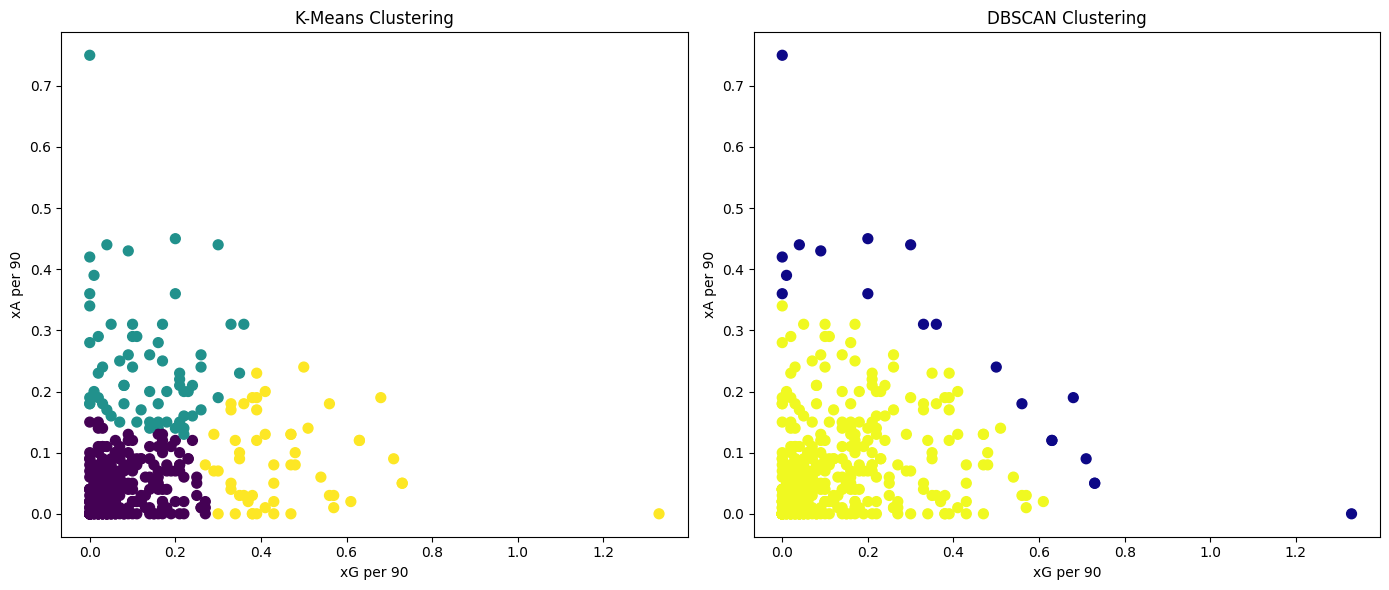

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Excel file
file_path = "/Users/marclambertes/Downloads/DB2425/NL1.xlsx"  # Update this with your file path
data = pd.read_excel(file_path)

# Step 2: Extract relevant metrics (e.g., xG per 90 and xA per 90)
# Ensure your Excel file contains columns named 'xG_per_90' and 'xA_per_90'
features = data[['xG per 90', 'xA per 90']].dropna()

# Standardize the data for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Step 4: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Step 5: Add clustering labels to the data for visualization
features['KMeans_Cluster'] = kmeans_labels
features['DBSCAN_Cluster'] = dbscan_labels

# Step 6: Visualize the Results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means Clustering Visualization
axes[0].scatter(features['xG per 90'], features['xA per 90'], c=features['KMeans_Cluster'], cmap='viridis', s=50)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('xG per 90')
axes[0].set_ylabel('xA per 90')

# DBSCAN Clustering Visualization
axes[1].scatter(features['xG per 90'], features['xA per 90'], c=features['DBSCAN_Cluster'], cmap='plasma', s=50)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('xG per 90')
axes[1].set_ylabel('xA per 90')

plt.tight_layout()
plt.show()



/Users/marclambertes/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


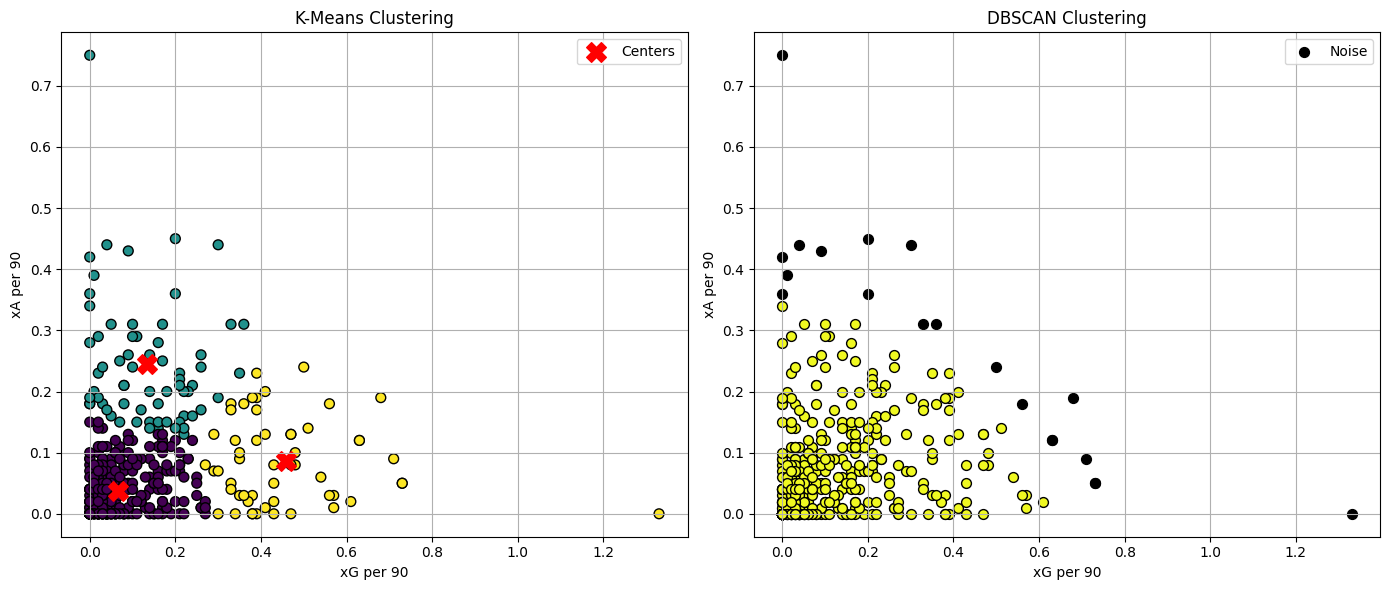

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Load the Excel file
file_path = "/Users/marclambertes/Downloads/DB2425/NL1.xlsx"  # Update this with your file path
data = pd.read_excel(file_path)

# Step 2: Extract relevant metrics (e.g., xG per 90 and xA per 90)
# Ensure your Excel file contains columns named 'xG per 90' and 'xA per 90'
features = data[['xG per 90', 'xA per 90']].dropna()

# Standardize the data for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Centers in original scale

# Step 4: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Step 5: Add clustering labels to the data for visualization
features['KMeans_Cluster'] = kmeans_labels
features['DBSCAN_Cluster'] = dbscan_labels

# Step 6: Visualize the Results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- K-Means Clustering Visualization ---
axes[0].scatter(features['xG per 90'], features['xA per 90'], 
                c=features['KMeans_Cluster'], cmap='viridis', s=50, edgecolor='k')
axes[0].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], 
                c='red', s=200, marker='X', label='Centers')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('xG per 90')
axes[0].set_ylabel('xA per 90')
axes[0].legend()
axes[0].grid(True)

# --- DBSCAN Clustering Visualization ---
# Identify outliers (noise points labeled as -1)
unique_labels = np.unique(dbscan_labels)
colors = [plt.cm.plasma(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:  # Noise points
        axes[1].scatter(features['xG per 90'][features['DBSCAN_Cluster'] == label],
                        features['xA per 90'][features['DBSCAN_Cluster'] == label],
                        c='black', s=50, label='Noise', edgecolor='k')
    else:
        axes[1].scatter(features['xG per 90'][features['DBSCAN_Cluster'] == label],
                        features['xA per 90'][features['DBSCAN_Cluster'] == label],
                        c=[color], s=50, edgecolor='k')

axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('xG per 90')
axes[1].set_ylabel('xA per 90')
axes[1].legend(loc='upper right')
axes[1].grid(True)

# Improve layout
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from glicko2 import Player  # You only need to import Player, not Rating
import openpyxl
from datetime import datetime

# Read the Excel file (you can modify the file path as needed)
def read_data_from_excel(file_path):
    return pd.read_excel(file_path)

# Function to calculate Glicko-2 rating for each player
def update_player_rating(player, xg, goals, shots, shots_on_target):
    """
    Calculate the player's performance score and update their Glicko-2 rating.
    The performance score is based on goals, xG, and shots on target.
    """
    # Performance score formula: adjust according to how you want to weight different stats
    performance_score = (goals + 0.5 * (xg - goals)) + 0.1 * (shots_on_target / shots)  # Example formula
    
    # Update the player's Glicko-2 rating based on their performance
    # Set a fixed expected score (you can refine this)
    expected_score = 0.5  # For simplicity, we are setting a fixed expected score here
    
    # Update the player rating with performance score
    player.update_rating(performance_score, expected_score)

# Function to update the player ratings and return the updated rankings
def update_striker_rankings(data):
    players = {}
    
    # Initialize Glicko-2 players with an initial rating of 1500 and deviation of 350
    for index, row in data.iterrows():
        player_name = row['Player']
        if player_name not in players:
            players[player_name] = Player(rating=1500, rd=350)  # Correct initialization here
        
        # Extract player statistics from the data
        xg = row['xG per 90']
        goals = row['Goals per 90']
        shots = row['Shots per 90']
        shots_on_target = row['Shots on target, %']
        
        # Update the player's Glicko-2 rating based on their performance
        update_player_rating(players[player_name], xg, goals, shots, shots_on_target)

    # Now, create a ranking based on the players' Glicko-2 ratings
    rankings = []
    for player_name, player in players.items():
        rankings.append((player_name, player.rating))

    # Sort players by their rating in descending order
    rankings.sort(key=lambda x: x[1], reverse=True)
    
    return rankings

# Function to export the updated rankings to a new Excel file
def export_rankings_to_excel(rankings, new_file_path):
    """
    Save the updated rankings to a new Excel file.
    """
    # Create a DataFrame from rankings list
    rankings_df = pd.DataFrame(rankings, columns=['Player', 'Rating'])
    
    # Write to a new Excel file (overwrite if it exists)
    rankings_df.to_excel(new_file_path, index=False)

# Main function to read data, update rankings, and export the result
def main(file_path, new_file_path):
    # Read the data from the Excel file
    data = read_data_from_excel(file_path)
    
    # Update the striker rankings using Glicko-2
    rankings = update_striker_rankings(data)
    
    # Export the updated rankings to a new Excel file
    export_rankings_to_excel(rankings, new_file_path)
    
    print(f"Rankings updated and saved to {new_file_path}!")

# Call main function with your original Excel file path and new Excel file path
if __name__ == "__main__":
    original_file_path = '/Users/marclambertes/Downloads/DB2425/Albania.xlsx'  # Change this to your input file path
    new_file_path = '/Users/marclambertes/Downloads/DB2425/Updated_Rankings.xlsx'  # Path for the new file with rankings
    main(original_file_path, new_file_path)


AttributeError: 'Player' object has no attribute 'update_rating'